# Homework 4: SVM


This assignment is due on Moodle by **11:59pm on Monday March 31**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/akkikiki/CSCI-4622-Machine-Learning-sp21/blob/main/info/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- In this homework you will explore the primal and dual representations of support vector machines, as well as the performance of various kernels while classifying sentiments. Install the following packages: `nltk` (Version: 3.5), `scikit-learn` (Version: 0.23.2)


**Please put your name and cuidentity username.**

**Name**: Allison Liu

**Identity Key**: alli7928

In [3]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

# Set random seed for deterministic output
np.random.seed(5622)

[40 Points] Problem 1 - Basic concepts of SVM
---

### Part 1 [10 points]
* What are the main differences between the primal and the dual representations?
* For the variables $\xi_i$, $C$ in the primal formation, what are their roles? Write out the upper/lower bounds (constraints) of these variables. What are the interpretation for these maximum/minimum values?
* For the variable $\alpha_i$, $\beta_i$ in the dual formation, what are the upper/lower bound (constraints) of them?

* The dual representation allows us to add dimensions to data sets that are not linearly separable, whereas the primal representation does not. Dual representations allow us to classify non-linear data sets and are Lagrangian based. Additionally, dual representation are more efficient/optimized. We optimize $\textbf{w}$ for the primal representation and $\alpha$ for the dual representation where $\textbf{w}$ represents a weight and $\alpha_i$ represents a Lagrange multiplier.
* The slack variable $\xi_i$ is a parameter which allows us to loosen some constraints on where a point lies with respect to the margin. It is particularly useful for non-linear datasets, for which the constraints cannot all be satisfied (outliers exist). It allows for slack (error) in the classification and penalizes outliers that are far from the margin on the wrong side. Slack variables make a hard-margin classifier into a soft-margin classifier. When the slack is equal to 0, there is no error needed to classify that point (and when slack is large, lots of error needed). Constraint: $\xi_i\ge0$. $C$ is a hyperparameter that controls the tradeoff between the margin and slack variables. If $C$ is small, the SVM will maximize the margin at the expense of making more classification mistakes. If $C$ is large, avoiding misclassification will be prioritized at the expense of a small margin (and noisy points will have a large effect). $C$ is a regularization parameter for SVMs. I was unable to find constraints for C, but it seemed that all choices of C that I found had $C>0$ with $C$ very close to 0 in very noisy datasets. In any case, $C$ should be tuned like any other hyperparameter.
* Constraints: $\alpha_i\ge0$ and $\beta_i\ge0$

### Part 2 [20 points]

 * Given a weight vector, implement the `find_support` function that returns the indices of the support vectors.
 * Given a weight vector, implement the `find_slack` function that returns the indices of the vectors with nonzero slack.
 * Given the alpha dual vector, implement the `weight_vector` function that returns the corresponding weight vector.

In [37]:
class SVM:
    def __init__(self):
        self.kINSP = np.array([
            (1, 8, +1),
            (7, 2, -1),
            (6, -1, -1),
            (-5, 0, +1),
            (-5, 1, -1),
            (-5, 2, +1),
            (6, 3, +1),
            (6, 1, -1),
            (5, 2, -1)
        ])
        self.kSEP = np.array([
            (-2, 2, +1),    # 0 - A
            (0, 4, +1),     # 1 - B
            (2, 1, +1),     # 2 - C
            (-2, -3, -1),   # 3 - D
            (0, -1, -1),    # 4 - E
            (2, -3, -1),    # 5 - F
        ])


    def weight_vector(self, x, y, alpha):
        """
        Given a vector of alphas, compute the primal weight vector w.
        The vector w should be returned as an Numpy array.
        
        Returns:
            w (np.ndarray): The primal weight vector w.
        """

        w = np.zeros(len(x[0]))
        # YOUR CODE HERE
        for i, x_ in enumerate(x.T):
            w[i] = np.sum(alpha*x_*y)
        return w



    def find_support(self, x, y, w, b, tolerance=0.001):
        """
        Given a set of training examples and primal weights, return the indices
        of all of the support vectors as a set.
        
        Returns:
            support (set) : set of support vector indices
        """

        support = set()
        # YOUR CODE HERE
        for i, (x_, y_) in enumerate(zip(x,y)):
            if y_*(w.dot(x_) + b) <= (1 + tolerance):
                support.add(i)
        return support



    def find_slack(self, x, y, w, b):
        """
        Given a set of training examples and primal weights, return the indices
        of all examples with nonzero slack as a set.
        
        Returns:
            slack (set) : set of slack indices 
        """

        slack = set()
        # YOUR CODE HERE
        for index, (x_, y_) in enumerate(zip(x,y)):
            if y_*(w.dot(x_) + b) < 1:
                slack.add(index)
        return slack

In [38]:
from tests import tests
tests.run_test_suite("prob 1", SVM)

TestWideSlack (tests.tests.TestSVM) ... ok
TestNarrowSlack (tests.tests.TestSVM) ... ok
TestSupport (tests.tests.TestSVM) ... ok
TestWeight (tests.tests.TestSVM) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.007s

OK


### Part 3 [10 points]

The goal of this problem is to correctly classify test data points, given a training data set.
For this problem, assume that we are training an SVM with a quadratic kernel, which means our kernel function is a polynomial kernel of degree 2. You are given the data set presented in the figure below. The slack penalty $C$ will determine the location of the decision boundary.

Justify the following questions in a sentence or via drawing decision boundary.
![training_data](./data/data.png)

* Where would the decision boundary be for very large values of $C$ ?

Dont need to answer:
* Where you would expect the decision boundary to be if  $C = 0$ ?
* Which of the two cases above would you expect to generalize better on test data? Why?

For very large values of C, the SVM would prioritize avoiding misclassifications over maximizing the margin. Thus, for this dataset, the decision boundary would separate the red and green points for very large C.

![training_data](./data/data-edited.png)

[30 points] Problem 2 - The Kernel Trick
---
The kernel trick can make SVM powerful and become non-linear. In this problem we will get familiar with the kernel trick.

### Part 1 [10 points]

We will construct a support vector machine that computes the XOR function, using values of +1 and −1 (instead of 1 and 0) for both inputs and outputs, so that an example looks like ($[−1, 1], 1$) or ($[−1, −1], −1$). 
- Map the input $[x_1, x_2]$ into a space consisting of $x_1$ and $x_1x_2$. 
- Plot the four input points in this space, and the maximal margin separator. 
- Give the margin value in the markdown cell. 

Remember to indicate which points have output +1 and which -1.

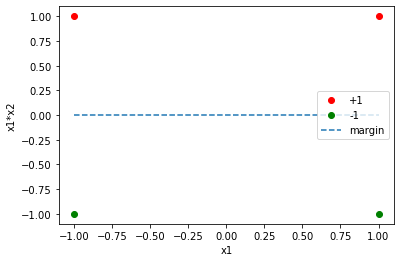

In [126]:
# YOUR CODE HERE
x = np.array([[-1,-1],[1,1],[-1,1],[1,-1]])
x_map = np.array([[x1, x1 * x2] for x1, x2 in x])
plt.plot(x_map.T[0,:2],x_map.T[1,:2], 'or', label='+1')
plt.plot(x_map.T[0,2:],x_map.T[1,2:], 'og', label='-1')
plt.plot([-1,1],[0,0], '--', label='margin')
plt.xlabel('x1')
plt.ylabel('x1*x2')
plt.legend(loc='right')
plt.show()

margin value = 1

### Part 2 [5 points]
Plot the separating line of **Part 1** back in the original Euclidean input space.

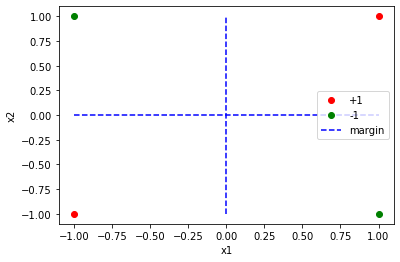

In [127]:
# YOUR CODE HERE
x = np.array([[-1,-1],[1,1],[-1,1],[1,-1]])
x_map = np.array([[x1, x1 * x2] for x1, x2 in x])
plt.plot(x.T[0,:2],x.T[1,:2], 'or', label='+1')
plt.plot(x.T[0,2:],x.T[1,2:], 'og', label='-1')
plt.plot([-1,1],[0,0], '--b', label='margin')
plt.plot([0,0],[-1,1], '--b')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='right')
plt.show()

### Part 3 [5 points]
Is the separator in **Part 1** linear? Is the one in **Part 2** linear? Explain your answer.

The separator in Part 1 is linear, while the separator in Part 2 is not linear. In Part 1, the separator is simply the line x1*x2=0 which is linear in the new space. However, in Part 2, the separator is not linear as it is composed of two lines. Additionally, the data is not linearly separable in the original space, so a separator could not be linear.

### Part 4 [10 points]
The key point of the so-called “kernel trick” in SVMs is to learn a classifier that effectively separates the training data in a higher dimensional space without having to explicitly compute the representation $\phi(\mathbf{x})$ of every point $\mathbf{x}$ in the original input space. Instead, all the work is done through the kernel function $K(\mathbf{x}_i, \mathbf{x}_i)$, for example, we can use $K(\mathbf{x}_i, \mathbf{x}_i) = \phi(\mathbf{x}_i)\phi(\mathbf{x}_j)$.

Show how to compute the squared Euclidean distance in the projected space between any two points $\mathbf{x}_i$, $\mathbf{x}_j$ in the original space without explicitly computing the $\phi$ mapping, instead using the kernel function $K$. In other words, derive $d(\phi(\mathbf{x}_i), \phi(\mathbf{x}_j)) = (\phi(\mathbf{x}_i) - \phi(\mathbf{x}_j))\cdot(\phi(\mathbf{x}_i) - \phi(\mathbf{x}_j))$ into a form using only the kernel function.

Please remember to simplify your solution.

$$d(\phi(\mathbf{x}_i), \phi(\mathbf{x}_j)) = (\phi(\mathbf{x}_i) - \phi(\mathbf{x}_j))\cdot(\phi(\mathbf{x}_i) - \phi(\mathbf{x}_j))$$ 

$$\\ = \phi(\mathbf{x}_i)\phi(\mathbf{x}_i)-2\phi(\mathbf{x}_i)\phi(\mathbf{x}_j)+\phi(\mathbf{x}_j)\phi(\mathbf{x}_j) $$

$$\\ = K(\mathbf{x}_i,\mathbf{x}_i)+K(\mathbf{x}_j, \mathbf{x}_j)-2K(\mathbf{x}_i, \mathbf{x}_j)$$

[30 points] Problem 3 - SVM with `sklearn`
---

In this problem, you will get familiar with important practical functions in scikit-learn such as pipeline, grid search, and cross validation. You will experiment with these using support vector machines.

Note that grid search can take some time on your laptop, so make sure that your code is correct with a small subset of the training data and search a reasonable number of options.

* Use the Sklearn implementation of support vector machines to train a classifier to distinguish Positive and negative sentiments
* Experiment with linear, polynomial, and RBF kernels. First, perform a GridSearch over each kernel function and a small set of parameters defined over a wide range to help narrow down the search space.
* Then choose the best performing kernel from your coarse scale search and define a narrower set of parameters for random search to further optimize the hyperparameters. Comment on the experiments you ran and optimal hyperparameters you found.
Hint: http://scikit-learn.org/stable/modules/grid_search.html
* Evaluate classification performance for each model for optimal parameters by testing on a hold-out set.

Following is a dataset containing reviews and sentiments associated with it.

We will create a SVM Classifier to predict positive or negative sentiments.

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
reviews  = pd.read_csv('./data/reviews.csv')
train, test = train_test_split(reviews, test_size=0.2, random_state=5622)
X_train = train['reviews']
X_test = test['reviews']
y_train = train['sentiment']
y_test = test['sentiment']

# Print some data info
print(f'[Sizes] train: {len(X_train)}, test: {len(X_test)}')
print(f'[Avg S] train: {sum(y_train)/len(X_train)}, test: {sum(y_test)/len(X_test)}')

[Sizes] train: 4000, test: 1000
[Avg S] train: 0.49875, test: 0.505


In [129]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

# download nltk data
nltk.download('stopwords')
en_stopwords = set(stopwords.words("english")) 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/allisonliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Part 1 [5 points]

Complete the `get_vectorizer` and `get_kfolds` functions below.

- Use [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to vectorize reviews as dictionary of term frequencies.
- Define the crossvalidation split using [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html?highlight=stratifiedkfold#sklearn.model_selection.StratifiedKFold).

In [130]:
def tokenize(text): 
    """
    Separate text into tokens
    """
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

def get_vectorizer():
    """ 
    
    Create and return a CountVectorizer
    
    Hints:
        Read docs on CountVectorizer to set arguments (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) 
        Pass the above tokenize function as the tokenizer.
        Use en_stopwords variable above as stopwords
        
        Play with different parameters.
        min_df argument can help with generalizability
    """
    
    # YOUR CODE HERE
    vectorizer = CountVectorizer(tokenizer=tokenize, stop_words=en_stopwords)
    return vectorizer

def get_kfolds():
    """ 
    Split dataset into 5 splits using StratifiedKFold 
    
    Hint:
    Remember to shuffle
    """
    # YOUR CODE HERE
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    kfolds = skf.split(X_train, y_train)
    return kfolds


vectorizer = get_vectorizer()
kfolds = get_kfolds()

In [131]:
# for grading; please ignore

### Part 2 [10 points]
* Create a pipeline with our `CountVectorizer` object in **Part 1** and an SVM Classifier.
* Create and fit a `GridSearchCV` object with the following parameter values:
  * Linear kernel, $C = 0.01, 1.0, 10.0$
  * Polynomial kernel, $\text{degree} = 2, 3$, $\gamma = 0.1, 0.5, 1$
  * RBF kernel, $\gamma = 0.1, 0.5, 1$
* Report accuracy on the best estimator from our `GridSearchCV` object. (Choose `GridSearchCV`'s `n_jobs` parameter as 1 if your system doesn't support multiprocessing)

In [134]:
def get_pipeline(**kwargs):
    """
        Define pipeline using make_pipeline (see sklearn docs) with vectorizer and SVM Classifier. 
        
        The SVM Classifer should take in all kwargs passed (passing kwargs can be achieved with fn(**kwargs))
        You should use balanced class weights for SVM.
    """
    
    # YOUR CODE HERE
    pipeline_svm = make_pipeline(vectorizer, SVC(**kwargs, class_weight='balanced'))
    return pipeline_svm

def get_course_params():
    """
        Create the grid search parameters defined above for course grid search. 
        Returns a list of dictionaries to be passed as argument to GridSearchCV below
    """
    
    # YOUR CODE HERE
    param_grid = [
        {
            'svc__kernel' : ['linear'],
            'svc__C' : [0.01, 1.0, 10.0]
        },
        {
            'svc__kernel' : ['poly'],
            'svc__degree' : [2,3],
            'svc__gamma' : [0.1, 0.5, 1.0]
        },
        {
            'svc__kernel' : ['rbf'],
            'svc__gamma' : [0.1, 0.5, 1.0]
        }
    ]
    return param_grid

def get_grid_svm():
    """
        Create GridSearchCV with pipeline and the grid search parameters given above using "accuracy" for scoring.
    """ 
     
    param_grid = get_course_params()
    pipeline_svm = get_pipeline()
    
    # YOUR CODE HERE
    grid_svm = GridSearchCV(
        pipeline_svm, 
        param_grid=param_grid, 
        scoring='accuracy', 
        verbose=1, 
        n_jobs=-1
    )
    
    return grid_svm
    
    

grid_svm = get_grid_svm()
# For debugging purposes, it makes sense to use a smaller set of training set to speed up the grid search progress
# refit is not necessary since by default refit is true in GridSearchCV, 
# but we did this to show that you need to use the best parameter to fit the whole training set
_ = grid_svm.fit(X_train, y_train)

In [ ]:
# For grading; please ignore.

In [135]:
best_params = None
best_score = None

# Store best parameters and CV score from grid search for reporting into the variables above
# YOUR CODE HERE
best_params = grid_svm.best_params_
best_score = grid_svm.best_score_

# Report best parameters and CV score from grid search
print(f'best params: {best_params} | best cv score: {best_score}')

best params: {'svc__C': 0.01, 'svc__kernel': 'linear'} | best cv score: 0.8745


In [136]:
# For grading; please ignore.

### Part 3 [10 points]

Choose the best performing kernel and parameter values from your coarse scale grid search and use them to set up a narrower range of parameter values. We will use randomized grid search to sample a fixed number of these candidate parameter sets for cross validation. The number of sampled parameter sets `n_iter` provides a trade-off between computational cost and quality of the "optimal" parameters. Feel free to experiment with different values of this parameter, but please change it back to `n_iter = 5` before submitting your assignment.

In [137]:
def get_params_fine_scale():
    """
        Set param_grid to a dictionary containing parameter values for fine scale search.
        Return value is passed as argument to RandomizedSearchCV below
    """ 
    # YOUR CODE HERE
    param_grid = {
        'svc__kernel' : ['linear'],
        'svc__C' : [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.5]
    }
    return param_grid

def get_random_svm():
    """
        Create randomized parameter search over fine scale grid;
        Do NOT change the value of n_iter in the submitted version of your notebook.
    """ 
    n_iter = 5
    pipeline_svm = get_pipeline()
    param_grid = get_params_fine_scale()

    random_svm = RandomizedSearchCV(
        pipeline_svm,
        param_grid,
        n_iter=n_iter,
        cv = kfolds,
        scoring="accuracy",
        verbose=1,   
        n_jobs=-1 # you can change the n_jobs parameter to -1 if your system supports multi-prcoessing
    )
    return random_svm

random_svm = get_random_svm()
# refit is not necessary since by default refit is true in RandomSearchCV, 
# but we did this to show that you need to use the best parameter to fit the whole training set
_ = random_svm.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min finished


In [140]:
best_params = None
best_score = None

# Store best parameters and score from random search for reporting into the variables above 
# YOUR CODE HERE
best_params = grid_svm.best_params_
best_score = grid_svm.best_score_

# Report best parameters and score from random search
print(f'best params: {best_params} | best cv score: {best_score}')

best params: {'svc__C': 0.01, 'svc__kernel': 'linear'} | best cv score: 0.8745


In [ ]:
# For grading; please ignore.

In [143]:
def report_results(model, X, y):
    # Reports various model metrics.  
    pred = model.predict(X)        
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result

In [144]:
# get test metrics.
report_results(random_svm.best_estimator_, X_test, y_test)

{'f1': 0.8821218074656189,
 'acc': 0.88,
 'precision': 0.8752436647173489,
 'recall': 0.8891089108910891}

### Part 4 [5 points]

Explain the overall procedure, and report the final result including which hyperparameter values were chosen. Make sure to explain your reasoning in choosing a refined parameter search space in **Part 3**.

To tune the hyperparameter values, we first ran a coarse search using many different kernels using a range of parameter values to determine broadly the optimal parameter values. Then, once the value was a little more refined/clear, we took the best one and optimized it further by testing a finer range of values. This method saves us from having to test every option finely, which would be incredibly time consuming.

After the coarse search, I obtained an accuracy of 0.8745 using a linear kernel with $C=0.01$. Then, I ran a finer search using the linear kernel across different values of $C$ near 0.01. The values I tested were between 0.001 and 0.5.

In the end, I obtained an f1 score of $~0.88$ and a similar accuracy. The best hyperparameter values were $C=0.01$ using a linear kernel.